Nilakshi_043_AIML_lab 7

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_train.csv');
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
# Display basic info about the data
print("\nDataset Info:")
print(df.info())

# Shape of the dataset
print("\nShape of dataset", df.shape)

# Check for missing values
print("\nMissing values: no missing values found")
print(df.isnull().sum())

# Summary statistics of numerical columns
print("\nstatistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    int32 
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    int32 
 9   Gender          346 non-null    int32 
dtypes: int32(3), int64(5), object(2)
memory usage: 23.1+ KB
None

Shape of dataset (346, 10)

Missing values: no missing values found
Unnamed: 0.1      0
Unnamed: 0        0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

sta

In [3]:
# unique values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n", df[col].value_counts())


Unique values in 'loan_status':
 loan_status
PAIDOFF       260
COLLECTION     86
Name: count, dtype: int64

Unique values in 'effective_date':
 effective_date
9/11/2016    166
9/12/2016     87
9/10/2016     31
9/14/2016     31
9/13/2016     20
9/9/2016       8
9/8/2016       3
Name: count, dtype: int64

Unique values in 'due_date':
 due_date
10/10/2016    90
9/25/2016     63
9/26/2016     42
10/11/2016    36
10/13/2016    19
10/9/2016     18
9/24/2016     12
9/27/2016     11
9/28/2016     10
11/9/2016      6
10/12/2016     6
10/8/2016      5
10/25/2016     4
11/10/2016     4
9/19/2016      3
9/23/2016      3
9/18/2016      3
9/16/2016      3
9/17/2016      2
11/12/2016     2
10/7/2016      2
10/26/2016     1
9/22/2016      1
Name: count, dtype: int64

Unique values in 'education':
 education
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: count, dtype: int64

Unique values in 'Gender':
 Gender
male      294
female  

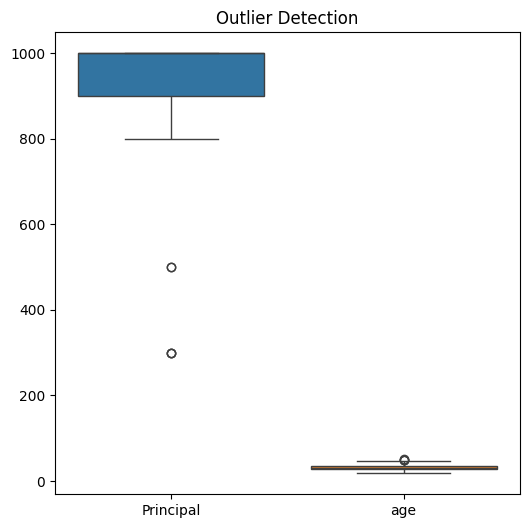

In [7]:
# Outliers detection
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['Principal', 'age']])
plt.title('Outlier Detection')
plt.show()

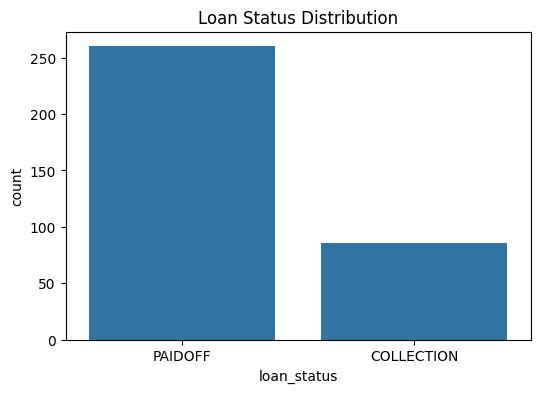

In [4]:
# Distribution of Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()

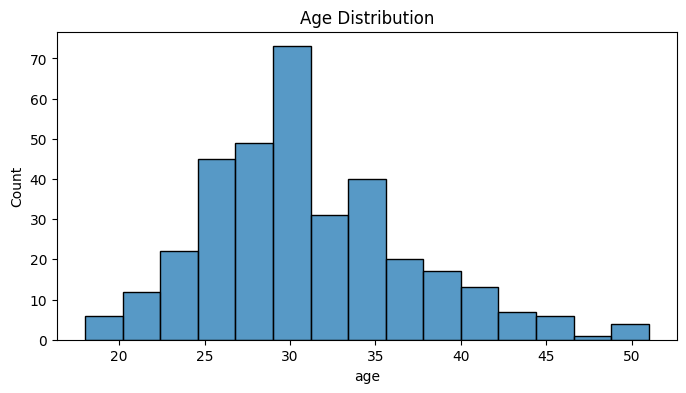

In [12]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [ ]:
# Distribution of Principal Amount
plt.figure(figsize=(8, 4))
# kde=> Kernal Density Estimate for smoothed estimate of the underlying probability density function of the data.
sns.histplot(df['Principal'], kde=True)
plt.title('Principal Distribution')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocessing
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])  # Encode target variable
df['education'] = le.fit_transform(df['education'])
df['Gender'] = le.fit_transform(df['Gender'])

X = df.drop('loan_status', axis=1)
y = df['loan_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80 : 20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ValueError: could not convert string to float: '9/8/2016'

In [34]:
# Function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Model: Logistic Regression
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        56

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



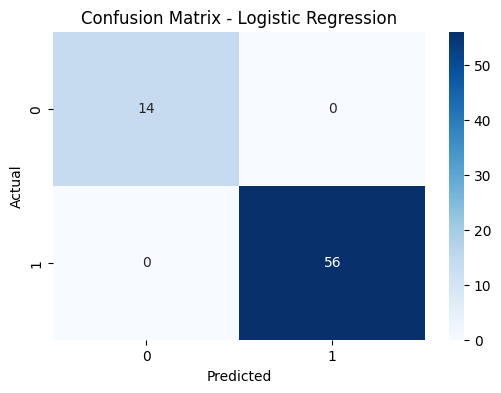

In [33]:
# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")


Model: K-Nearest Neighbors
Accuracy: 0.9429

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.93      1.00      0.97        56

    accuracy                           0.94        70
   macro avg       0.97      0.86      0.90        70
weighted avg       0.95      0.94      0.94        70



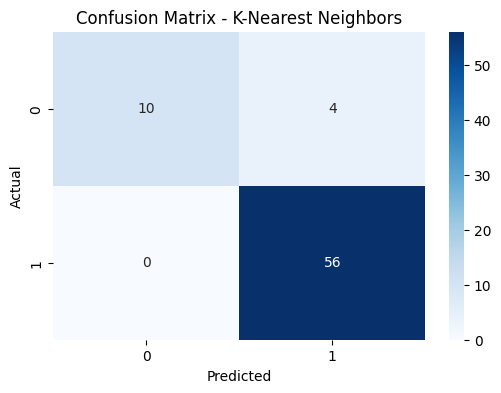

In [32]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "K-Nearest Neighbors")


Model: Support Vector Machine
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        56

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



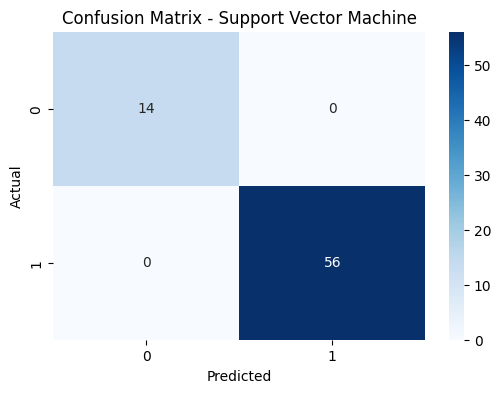

In [31]:
# SVM Classifier
svm = SVC(kernel='linear')
evaluate_model(svm, "Support Vector Machine")


Model: Decision Tree
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        56

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



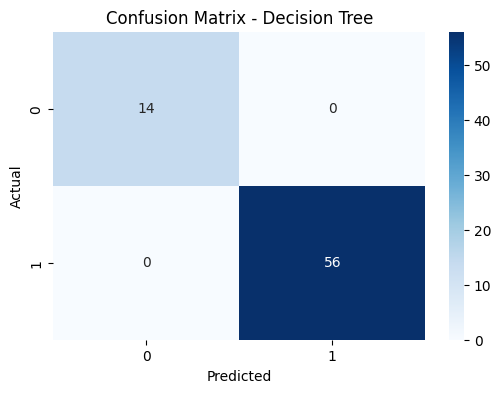

In [30]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
evaluate_model(dt, "Decision Tree")


Model: Naive Bayes
Accuracy: 0.9857

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.98      1.00      0.99        56

    accuracy                           0.99        70
   macro avg       0.99      0.96      0.98        70
weighted avg       0.99      0.99      0.99        70



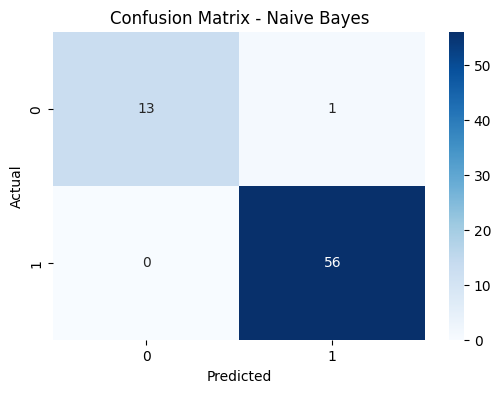

In [29]:
# Naive Bayes Classifier
nb = GaussianNB()
evaluate_model(nb, "Naive Bayes")

In [45]:
#Summary of Accuracy of Models
data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'KNN'],
    'Accuracy': [1.0000, 0.9857, 1.0000, 1.0000, 0.9429]
}

df = pd.DataFrame(data)
print(df)

print('\nFinal Models: Logistic Regression, Decision Tree, SVM')

                 Model  Accuracy
0  Logistic Regression    1.0000
1          Naive Bayes    0.9857
2        Decision Tree    1.0000
3                  SVM    1.0000
4                  KNN    0.9429

Final Models: Logistic Regression, Decision Tree, SVM
